# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [129]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from pylab import subplot
from skimage.morphology import erosion, disk, dilation, opening, closing, remove_small_objects, remove_small_holes
from skimage.filters import threshold_otsu, threshold_li, threshold_isodata, threshold_yen
from skimage.measure import label, regionprops
from skimage.draw import circle_perimeter

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

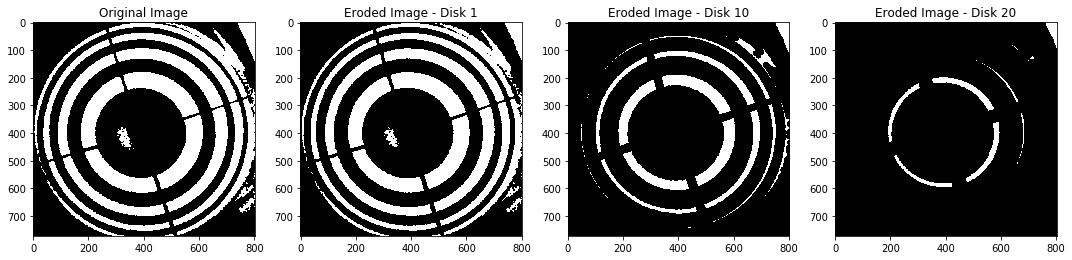

In [130]:
img_path = "./images/"
img_name = "FindingContours.png"
image = io.imread(img_path.__add__(img_name))
eroded1 = erosion(image, disk(1))
eroded2 = erosion(image, disk(10))
eroded3 = erosion(image, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
subplot(1,4,1)
io.imshow(image)
plt.title('Original Image')
subplot(1,4,2)
io.imshow(eroded1)
plt.title('Eroded Image - Disk 1')
subplot(1,4,3)
io.imshow(eroded2)
plt.title('Eroded Image - Disk 10')
subplot(1,4,4)
io.imshow(eroded3)
plt.title('Eroded Image - Disk 20')

** Q.1.2 Dilation **

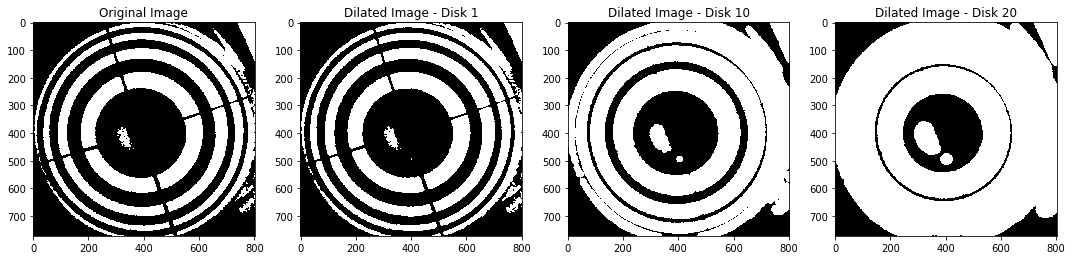

In [131]:
img_path = "./images/"
img_name = "FindingContours.png"
image = io.imread(img_path.__add__(img_name))
dilated1 = dilation(image, disk(1))
dilated2 = dilation(image, disk(10))
dilated3 = dilation(image, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
subplot(1,4,1)
io.imshow(image)
plt.title('Original Image')
subplot(1,4,2)
io.imshow(dilated1)
plt.title('Dilated Image - Disk 1')
subplot(1,4,3)
io.imshow(dilated2)
plt.title('Dilated Image - Disk 10')
subplot(1,4,4)
io.imshow(dilated3)
plt.title('Dilated Image - Disk 20')

** Q.1.3 Opening **

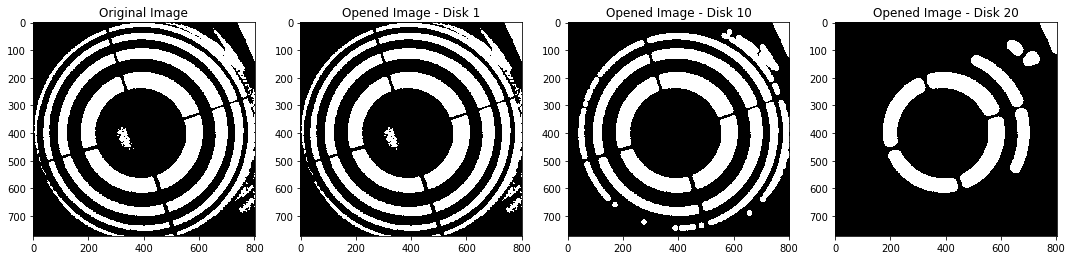

In [132]:
img_path = "./images/"
img_name = "FindingContours.png"
image = io.imread(img_path.__add__(img_name))
openned1 = opening(image, disk(1))
openned2 = opening(image, disk(10))
openned3 = opening(image, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
subplot(1,4,1)
io.imshow(image)
plt.title('Original Image')
subplot(1,4,2)
io.imshow(openned1)
plt.title('Opened Image - Disk 1')
subplot(1,4,3)
io.imshow(openned2)
plt.title('Opened Image - Disk 10')
subplot(1,4,4)
io.imshow(openned3)
plt.title('Opened Image - Disk 20')

** Q.1.4 Closing**

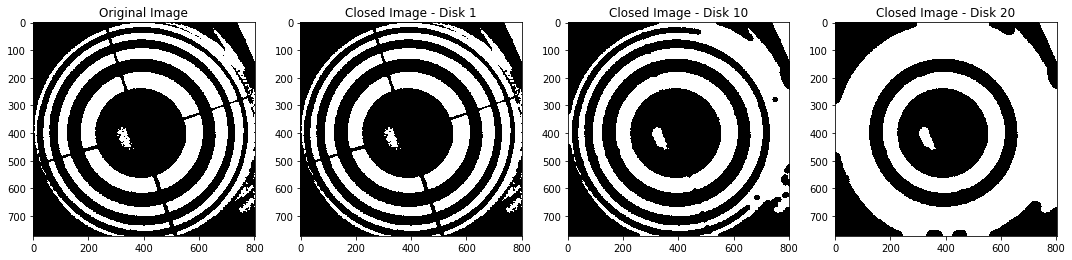

In [133]:
img_path = "./images/"
img_name = "FindingContours.png"
image = io.imread(img_path.__add__(img_name))
closed1 = closing(image, disk(1))
closed2 = closing(image, disk(10))
closed3 = closing(image, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
subplot(1,4,1)
io.imshow(image)
plt.title('Original Image')
subplot(1,4,2)
io.imshow(closed1)
plt.title('Closed Image - Disk 1')
subplot(1,4,3)
io.imshow(closed2)
plt.title('Closed Image - Disk 10')
subplot(1,4,4)
io.imshow(closed3)
plt.title('Closed Image - Disk 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion and dilation are opposite morphological operations. Erosion get's the minimum value over all neighborhood pixels, while dilation get's the maximum. That's why erosion enlarges dark regions and dilation enlarges bright regions.
Opening and closing both combinations of erosion and dilation operations, but they are also opposite. Opening is a erosion followed by a dilation, and closing is a dilation followed by a erosion. That way, opening opeartion will remove small bright spots and connect small dark cracks, while closing operation will remove small dark spots and connect small bright cracks

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


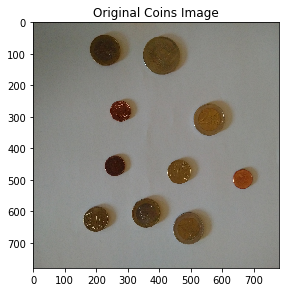

In [134]:
img_path = "./images/"
img_name = "coins.jpg"
coins = io.imread(img_path.__add__(img_name),mode='L')
coins = rescale(coins, scale=0.25)
io.imshow(coins)
plt.title('Original Coins Image')


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

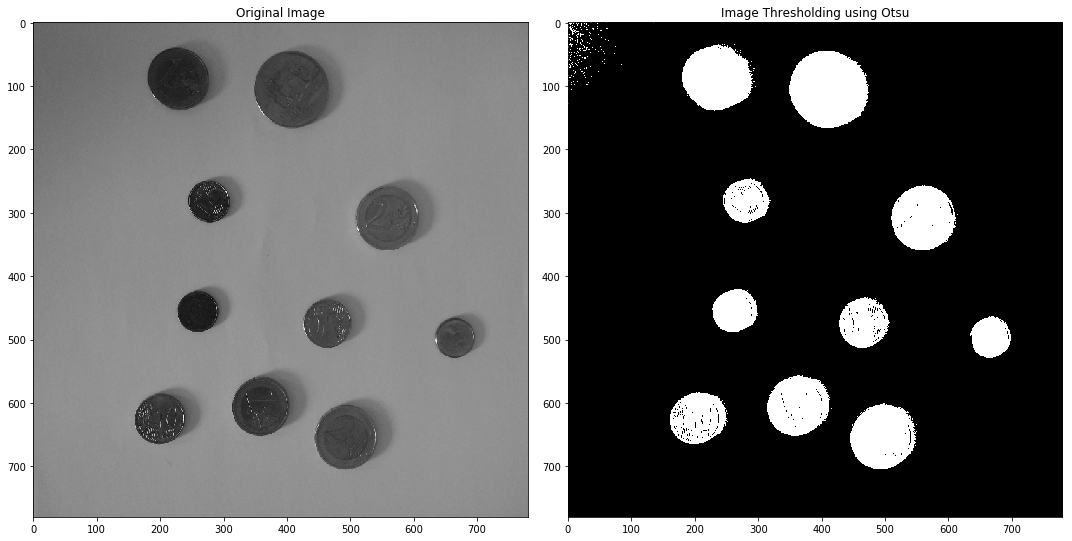

In [135]:
coins = rgb2gray(coins)
thresh = threshold_otsu(coins)
new_coins = coins <= thresh

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
subplot(1,2,1)
io.imshow(coins)
plt.title('Original Image')
subplot(1,2,2)
io.imshow(new_coins)
plt.title('Image Thresholding using Otsu')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

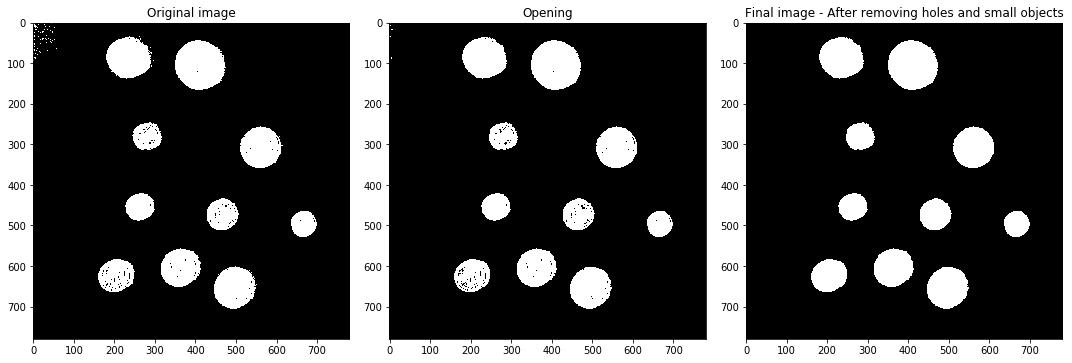

In [136]:
eroded = erosion(new_coins, disk(1))
dilated = dilation(new_coins, disk(1))
openned = opening(new_coins, disk(1))
closed = closing(new_coins, disk(1))
closed2 = closing(new_coins, disk(10))
transformed_coins = openned # Defined openned image as the best transformation image
transformed_coins = remove_small_holes(transformed_coins,min_size=100) # Apply hole removal to refine the transformation
transformed_coins = remove_small_objects(transformed_coins)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(new_coins)
plt.title('Original image')
subplot(1,3,2)
io.imshow(openned)
plt.title('Opening')
subplot(1,3,3)
io.imshow(transformed_coins)
plt.title('Final image - After removing holes and small objects')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of regions found: 10
Radius of each region:
52.642244149694854
61.315235184387504
34.77440520860451
50.72374996018709
34.604649858413836
38.896360871314904
31.805484091459554
47.99923912103479
42.419403421040336
51.114455350678966


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


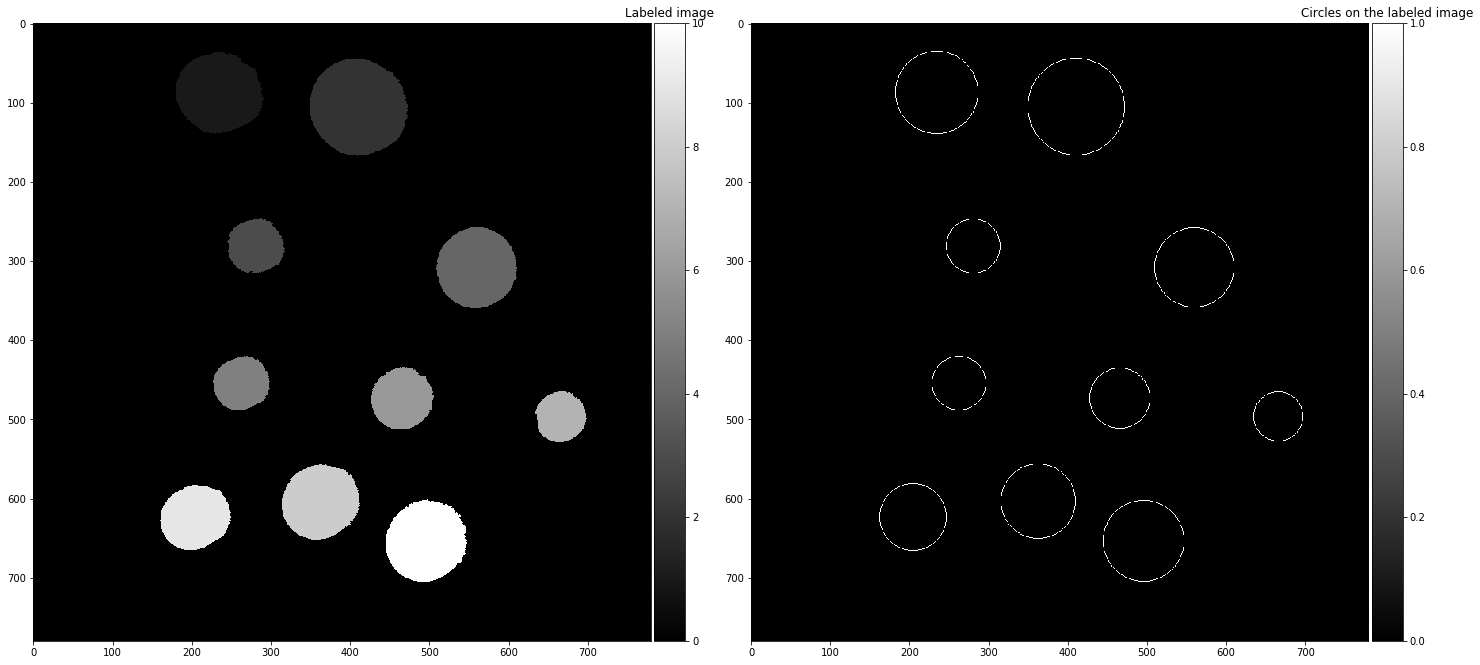

In [137]:
labeled = label(transformed_coins)
regions = regionprops(labeled)
print('Number of regions found:', len(regions))
print('Radius of each region:')
for i in range (0, len(regions)):
    print(regions[i].equivalent_diameter/2)
mask = np.zeros_like(transformed_coins)
for i in range (0, len(regions)):
    r, c = regions[i].centroid
    rad = int(regions[i].equivalent_diameter/2)
    rr, cc = circle_perimeter(int(r),int(c),rad)
    mask[rr, cc] = 1
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
subplot(1,2,1)
io.imshow(labeled, cmap='gray')
plt.title('Labeled image')
subplot(1,2,2)
io.imshow(mask, cmap='gray')
plt.title('Circles on the labeled image')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

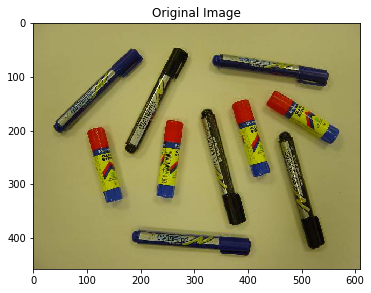

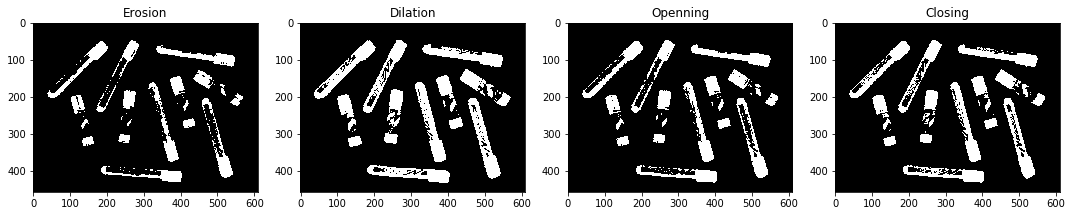

In [138]:
# Loading the image and trying different transformations to get the most uniform one
# The best transformation is able to label the 10 objects correctly, without splitting or merging them
img_path = "./images/"
img_name = "objets4.jpg"
objects = io.imread(img_path.__add__(img_name))
io.imshow(objects)
plt.title('Original Image')

objects = rgb2gray(objects)
#threshold_li, threshold_isodata, threshold_yen - Different Thresholding methods
thresh = threshold_li(objects)
new_objects = objects <= thresh

eroded = erosion(new_objects, disk(1))
dilated = dilation(new_objects, disk(1))
openned = opening(new_objects, disk(1))
closed = closing(new_objects, disk(1))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
subplot(1,4,1)
io.imshow(eroded)
plt.title('Erosion')
subplot(1,4,2)
io.imshow(dilated)
plt.title('Dilation')
subplot(1,4,3)
io.imshow(openned)
plt.title('Openning')
subplot(1,4,4)
io.imshow(closed)
plt.title('Closing')                     

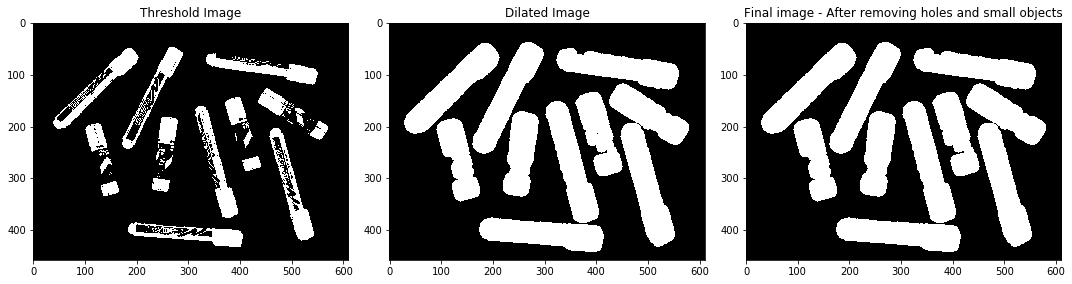

In [139]:
best_object = dilation(new_objects, disk(10)) # Defined dilated image as the best transformation image
transformed_objects = remove_small_holes(best_object,min_size=140) # Apply hole removal to refine the transformation
transformed_objects = remove_small_objects(transformed_objects,min_size=70) # Apply small objects removal to refine the transformation

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(new_objects)
plt.title('Threshold Image')
subplot(1,3,2)
io.imshow(best_object)
plt.title('Dilated Image')
subplot(1,3,3)
io.imshow(transformed_objects)
plt.title('Final image - After removing holes and small objects')

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


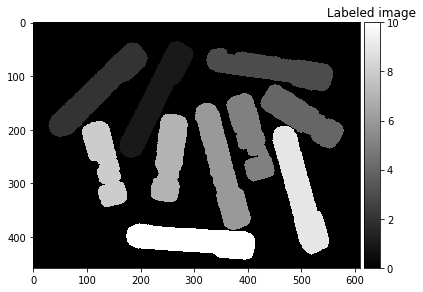

In [140]:
labeled_objects = label(transformed_objects)
io.imshow(labeled_objects, cmap='gray')
plt.title('Labeled image')
# 10 objects correctly identified

In [141]:
# We can see that we have two types of objects: glues and markers. They have similar shape, but the area of the markers is
# greater than those of the glues. So we can use this parameter to separate them
regions_objects = regionprops(labeled_objects)
print('Number of objects found:', len(regions_objects))
print('Area of each object found:')
areas = []
for i in range (0, len(regions_objects)):
    print(regions_objects[i].area)
    areas.append(regions_objects[i].area)
mean_area = np.mean(areas)
print('Mean area:',mean_area)

Number of objects found: 10
Area of each object found:
10561
10894
10519
8285
7806
10813
7924
7345
11376
10884
Mean area: 9640.7


In [142]:
# If the area of the object is greater than the mean area of all objects, then the object is a marker. If not, it's a glue.
glues = 0
markers = 0
for i in range (0, len(regions_objects)):
    if regions_objects[i].area > mean_area:
        markers = markers +1
    else:
        glues = glues + 1
print('Number of markers found:', markers)
print('Number of glues found:', glues)

Number of markers found: 6
Number of glues found: 4
